#General Information
This projekt ist about several experiments with children. More information about the age and gender is found in the first dataset called Demographics.


import libraries

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm
from scipy.stats import shapiro
from scipy import stats
import statistics
from google.colab import drive 
import statsmodels.api as sm
drive.mount('/content/drive',force_remount=True)
import os 
os.chdir("/content/drive/My Drive/Snippets_Adventures/Daten")
!ls

#Set path to your data here
#We mä i sim google drive ä vrchnüpfig zum teilte ordner macht (rächtsklicke ufe teilt ordner), de chame diräkt uf date im teilte ordner zuegrife u de würd dr path unge theoretisch für aui glich funktioniere
path = "/content/drive/My Drive/Snippets_Adventures/Daten/"


Mounted at /content/drive
 CAS_Data.xlsx			 ID_Age_Gender.xlsx
'EF_Hearts&Flowers.xlsx'	 MotorSkillsHandwriting.ipynb
 EF_Maulwurf.xlsx		 Overview_neu.pdf
 Feinmotorik_Kindergarten.xlsx	'Schreiben_Beschreibung der Variablen.docx'
 GRAFOS_Feinmotorik_0908.xlsx	 Schreiben.xlsx


#Read data and create data frames


##Demographic Informations
This table contains information on age and gender of the children who participated in the experiments.

###Read data

In [ ]:
#read data
demographics = pd.read_excel(path+"ID_Age_Gender.xlsx")
demographics

,ID,gender (0 = female),age(months)
0,1104,0,89
1,1106,1,91
2,1107,1,94
3,1108,0,81
4,1109,1,83
...,...,...,...
113,1814,1,93
114,1815,1,93
115,1816,1,97
116,1817,1,90


###Create new variables



In [ ]:
#Rename variables
demographics=demographics.rename({'gender (0 = female)': 'Geschlecht', 'age(months)' : 'Alter_Monate'}, axis=1)

#Create age in years
demographics['Alter_Jahre']=(demographics['Alter_Monate']/12).astype(int)

###Descriptive statistics
118 children<br>
Average age is seven(oldest child is eight years old, youngest six)<br>
54% are male

In [ ]:
demographics.describe(include='all').round(2)

,ID,Geschlecht,Alter_Monate,Alter_Jahre
count,118.00,118.00,118.00,118.00
mean,1524.25,0.54,88.75,6.92
std,291.89,0.50,5.26,0.54
min,1104.00,0.00,80.00,6.00
25%,1216.25,0.00,85.00,7.00
50%,1608.50,1.00,88.00,7.00
75%,1805.75,1.00,92.00,7.00
max,1917.00,1.00,103.00,8.00


## Executive functions: Maulwurf


Maulwurf --> Arbeitsgedächtnis

###Read data

In [ ]:
#read data
maulwurf =pd.read_excel(path+"EF_Maulwurf.xlsx")
maulwurf=maulwurf.rename({'subject': 'ID'}, axis=1)
maulwurf

,ID,type,seq,trial,level,spanLength,recognition_RT,recognition_correct,recognition_fields_correct,recognition_fieldsCorrect_irrespectivePosition
0,1104,practise,"[6,8]",1,2,0,21176,0,0,0
1,1104,practise,"[6,8]",1,2,0,9423,0,0,0
2,1104,practise,"[6,8]",1,2,0,6211,0,0,0
3,1104,practise,"[6,8]",1,2,0,5807,0,0,1
4,1104,practise,"[6,8]",1,2,0,2464,0,0,2
...,...,...,...,...,...,...,...,...,...,...
2253,1917,exp,"[1,8,6,14]",2,4,3,10391,0,1,3
2254,1917,exp,"[3,12,1,13]",3,4,3,3391,0,2,3
2255,1917,exp,"[9,15,4,2]",4,4,3,4748,0,0,3
2256,1917,exp,"[10,1,16,3]",5,4,3,3918,0,0,3


###Create new variables / aggregate data

Um das Arbeitsgedächtnis zu berechnen: 
Folgende Variablen im Datenset "Maulwurf" sind Indikatoren für die Arbeitsgedächtniskapazität: 
"**spanLength**" (= Maximal erreichte Gedächtnisspanne) <br>
 "**recognition_fields_correct**: Select only trials from type "exp": Summe von Trials "1". Also Summe der korrekten Trials in den exp Trials. <br>
"**recognition_fieldsCorrect_irrespectivePosition**": Select only trials from type "exp": Summe von Trials "1". Also Summe der korrekten Trials in den exp Trials.

In [ ]:
#exclude test-runs
maulwurf_agg = maulwurf[maulwurf['type'] == 'exp']

#aggregate data by child
maulwurf_agg = maulwurf.groupby('ID').aggregate({'spanLength': 'max', 'recognition_fields_correct' : 'sum', 'recognition_fieldsCorrect_irrespectivePosition' : 'sum'})
maulwurf_agg

,spanLength,recognition_fields_correct,recognition_fieldsCorrect_irrespectivePosition
ID,,,
1104,0,9,21
1106,3,37,53
1107,2,20,39
1108,2,12,21
1109,3,29,34
...,...,...,...
1913,4,48,59
1914,2,10,18
1915,4,42,55


###Descriptive statistics

Histograms

In [ ]:
#descriptive statistics
maulwurf_agg.describe(include='all').round(2)

,spanLength,recognition_fields_correct,recognition_fieldsCorrect_irrespectivePosition
count,116.00,116.00,116.00
mean,2.79,30.35,42.54
std,0.97,15.67,16.65
min,0.00,8.00,15.00
25%,2.00,20.75,33.00
50%,3.00,27.50,38.00
75%,3.00,40.25,53.00
max,6.00,82.00,110.00


In [ ]:
kurt = maulwurf_agg.kurt(axis = 0, skipna = True)
print('Kurtosis spanLength: ', kurt['spanLength'])
print('Kurtosis recognition_fields_correct: ', kurt['recognition_fields_correct'])
print('Kurtosis recognition_fieldsCorrect_irrespectivePosition: ', kurt['recognition_fieldsCorrect_irrespectivePosition'])

Kurtosis spanLength:  1.7643781904366977
Kurtosis recognition_fields_correct:  0.8013347568736959
Kurtosis recognition_fieldsCorrect_irrespectivePosition:  1.9339006729338144


In [ ]:
skew = maulwurf_agg.skew(axis = 0, skipna = True)
print('Skewness spanLength: ', skew['spanLength'])
print('Skewness recognition_fields_correct: ', skew['recognition_fields_correct'])
print('Skewness recognition_fieldsCorrect_irrespectivePosition: ', skew['recognition_fieldsCorrect_irrespectivePosition'])

Skewness spanLength:  -0.49163229253391943
Skewness recognition_fields_correct:  0.928709749536594
Skewness recognition_fieldsCorrect_irrespectivePosition:  1.1531428076420405


Text(0.5, 1.0, 'recognition_fieldsCorrect_irrespectivePosition')

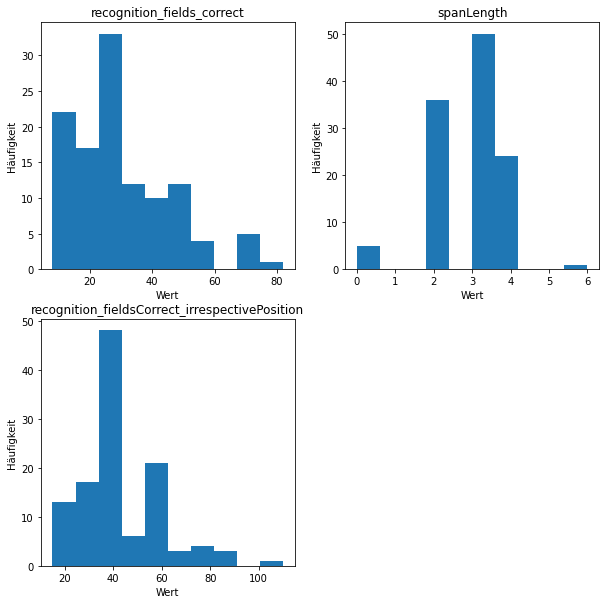

In [ ]:
#histograms
plt.figure(figsize=(10  ,10))
plt.subplot(221)
plt.hist(maulwurf_agg['recognition_fields_correct'])
plt.xlabel("Wert")
plt.ylabel("Häufigkeit")
plt.title('recognition_fields_correct')

plt.subplot(222)
plt.hist(maulwurf_agg['spanLength'])
plt.xlabel("Wert")
plt.ylabel("Häufigkeit")
plt.title('spanLength')

plt.subplot(223)
plt.hist(maulwurf_agg['recognition_fieldsCorrect_irrespectivePosition'])
plt.xlabel("Wert")
plt.ylabel("Häufigkeit")
plt.title('recognition_fieldsCorrect_irrespectivePosition')


QQ-Plots / Normality-Test

 spanLength 
Alpha =  0.001
p =  0.002835954176869791
The null hypothesis cannot be rejected 

 recognition_fields_correct 
Alpha =  0.001
p =  0.00025563927043534116
The null hypothesis can be rejected 

 recognition_fieldsCorrect_irrespectivePosition 
Alpha =  0.001
p =  1.1665524932355824e-06
The null hypothesis can be rejected 



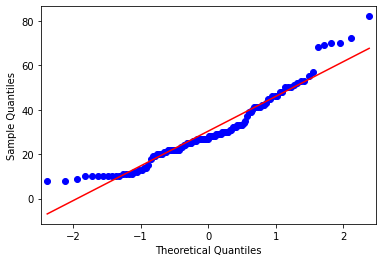

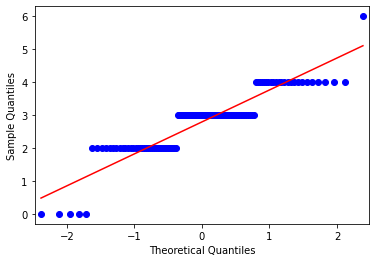

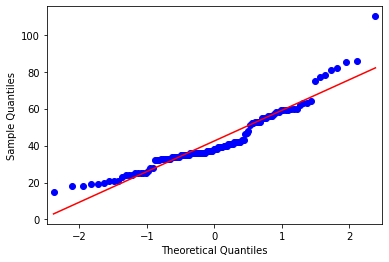

In [ ]:
#Test for normality

for column in maulwurf_agg:
  print('\033[1m', column, '\033[0m')
  k2, p = stats.normaltest(maulwurf_agg[column]) # D Agostino-Pearson. The method returns the test statistic value and the p-value
  alpha = 0.001 # Rejection criterion defined by you
  print('Alpha = ',alpha)
  print('p = ',p)
  if p < alpha:  # null hypothesis: x comes from a normal distribution
      print("The null hypothesis can be rejected \n")
  else:
    print("The null hypothesis cannot be rejected \n")


#QQ-Plots
fig = sm.qqplot(maulwurf_agg['recognition_fields_correct'], line='s')
fig2=  sm.qqplot(maulwurf_agg['spanLength'], line='s')
fig3 = sm.qqplot(maulwurf_agg['recognition_fieldsCorrect_irrespectivePosition'], line='s') 


## Executive functions: Hearts and Flowers

Hearts & Flowers: Flowers Trials --> Inhibition 
Hearts & Flowers: Mixed Trials --> Shifting

###Read data

In [ ]:
HF =pd.read_excel(path+"EF_Hearts&Flowers.xlsx")
HF = HF.drop(columns=['fileName'])
HF=HF.rename({'subject': 'ID'}, axis=1)
HF = HF.replace("undefined",np.NaN)
HF['ID'] = HF['ID'].replace(['heartsAndFlowers'],-99)

###Create variables / aggregate data

To calculate inhibition:
#### a) **Accuracy** (Number of correct trials divided by / total number of trials): 
Select only trials from Block "flowerGameTest". Anzahl Trials correct "1" / Anzahl Trials total ("1" und "0")

#### b) **RT** (Reaction Time): 
Select only trials from Block "flowerGameTest" and correct "1". Mean RT of these trials. Also nur Reaktionszeit von den korrekten Trials einschliessen..

<br>

Um Shifting zu berechnen: 
#### a) **Accuracy** (Anzahl korrekte Trials / total Trials): 
Select only trials from Block "mixedGame". Anzahl Trials correct "1" / Anzahl Trials total ("1" und "0")

#### b) **RT** (Reaction Time): 
Select only trials from Block "mixedGame" and correct "1". Mean RT of these trials. Also nur Reaktionszeit von den korrekten Trials einschliessen.

In [ ]:
#Inhibition
HF_flower = HF[HF['block'] == 'flowerGameTest']


#Calculate accuracy
HF_flower2 = HF_flower.groupby('ID').aggregate({'correct': 'sum', 'trial' : 'max'})
#calculate reaction time
HF_flower3 = HF_flower[HF_flower['correct']==1].groupby('ID').aggregate({'RT': 'mean'})

#Merge accuracy and reaction time to one data frame ### Michelle: Verstehe ich nicht, die sind doch schon imselben dataframe?
#FGT = flower game test
HF_flower4 = pd.merge(HF_flower2, HF_flower3, on='ID', how='outer')
HF_flower4['accuracy_inhibition_FGT'] = HF_flower4['correct']/HF_flower4['trial']
HF_flower4 = HF_flower4.rename({'correct': 'correct_FGT', 'trial' : 'trials_FGT', 'RT' : 'RT_inhibition_FGT'}, axis=1)


#Shifting
HF_mixed = HF[HF['block'] == 'mixedGame']
#Calculate accuracy
HF_mixed2 = HF_mixed.groupby('ID').aggregate({'correct': 'sum', 'trial' : 'max'})
#calculate reaction time
HF_mixed3 = HF_mixed[HF_mixed['correct']==1].groupby('ID').aggregate({'RT': 'mean'})
#Merge accuracy and reaction time to one data frame
#MG = Mixed Game
HF_mixed4 = pd.merge(HF_mixed2, HF_mixed3, on='ID', how='outer')
HF_mixed4['accuracy_shifting_MG'] = HF_mixed4['correct']/HF_mixed4['trial'] # kannst du mir das ev. mal erklären was du genau gemacht hast?:)
HF_mixed4=HF_mixed4.rename({'correct': 'correct_MG', 'trial' : 'trials_MG', 'RT' : 'RT_shifting_MG'}, axis=1) # warum braucht es axis=1 ?


#merge Shifting and inhibition
HF_agg = pd.merge(HF_mixed4, HF_flower4, on='ID', how='outer')
HF_agg

,correct_MG,trials_MG,RT_shifting_MG,accuracy_shifting_MG,correct_FGT,trials_FGT,RT_inhibition_FGT,accuracy_inhibition_FGT
ID,,,,,,,,
-99,0,60,NaN,0.000000,0,36,NaN,0.000000
1104,0,60,NaN,0.000000,26,36,1053.230769,0.722222
1106,51,60,642.078431,0.850000,31,36,830.354839,0.861111
1107,49,60,841.000000,0.816667,32,36,696.625000,0.888889
1108,52,60,853.480769,0.866667,34,36,767.794118,0.944444
...,...,...,...,...,...,...,...,...
1913,57,60,779.298246,0.950000,35,36,553.771429,0.972222
1914,0,60,NaN,0.000000,0,36,NaN,0.000000
1915,0,60,NaN,0.000000,0,36,NaN,0.000000


###Descriptive Statistics

Histograms

In [ ]:
#descriptive statistics
HF_agg.describe(include='all').round(2)

,correct_MG,trials_MG,RT_shifting_MG,accuracy_shifting_MG,correct_FGT,trials_FGT,RT_inhibition_FGT,accuracy_inhibition_FGT
count,117.00,117.0,90.00,117.00,117.00,117.0,109.00,117.00
mean,38.79,60.0,915.95,0.65,30.02,36.0,789.89,0.83
std,21.78,0.0,445.91,0.36,9.46,0.0,217.79,0.26
min,0.00,60.0,449.46,0.00,0.00,36.0,415.25,0.00
25%,40.00,60.0,698.02,0.67,31.00,36.0,646.00,0.86
50%,49.00,60.0,818.90,0.82,34.00,36.0,766.22,0.94
75%,53.00,60.0,993.91,0.88,35.00,36.0,873.52,0.97
max,60.00,60.0,3947.90,1.00,36.00,36.0,1866.08,1.00


In [ ]:
kurt = HF_agg.kurt(axis = 0, skipna = True)
print('Kurtosis RT_shifting_MG: ', kurt['RT_shifting_MG'])
print('Kurtosis accuracy_shifting_MG: ', kurt['accuracy_shifting_MG'])
print('Kurtosis RT_inhibition_FGT: ', kurt['RT_inhibition_FGT'])
print('Kurtosis accuracy_inhibition_FGT: ', kurt['accuracy_inhibition_FGT'])

Kurtosis RT_shifting_MG:  25.18820568884609
Kurtosis accuracy_shifting_MG:  -0.4806302649984948
Kurtosis RT_inhibition_FGT:  6.441161507976
Kurtosis accuracy_inhibition_FGT:  5.051511252346056


In [ ]:
skew = HF_agg.skew(axis = 0, skipna = True)
print('Skewness RT_shifting_MG: ', skew['RT_shifting_MG'])
print('Skewness accuracy_shifting_MG: ', skew['accuracy_shifting_MG'])
print('Skewness RT_inhibition_FGT: ', skew['RT_inhibition_FGT'])
print('Skewness accuracy_inhibition_FGT: ', skew['accuracy_inhibition_FGT'])

Skewness RT_shifting_MG:  4.330426442161312
Skewness accuracy_shifting_MG:  -1.1592126244036645
Skewness RT_inhibition_FGT:  1.8736309250369059
Skewness accuracy_inhibition_FGT:  -2.4599817006981577


Text(0.5, 1.0, 'accuracy_inhibition_FGT')

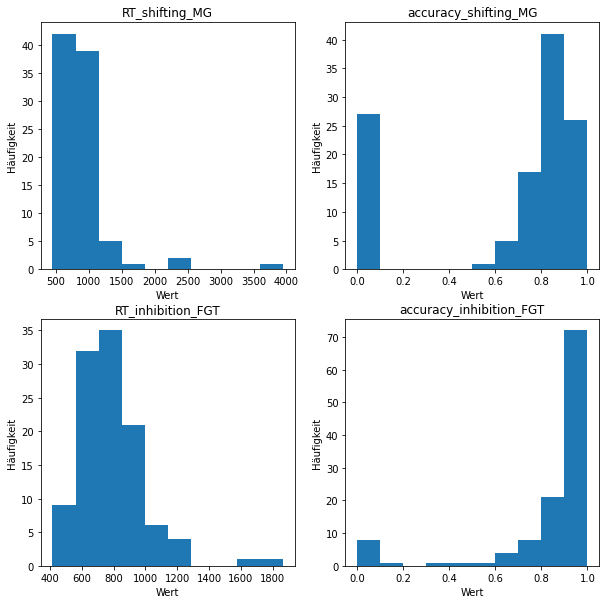

In [ ]:
#histograms
plt.figure(figsize=(10  ,10))
plt.subplot(221)
plt.hist(HF_agg['RT_shifting_MG'])
plt.xlabel("Wert")
plt.ylabel("Häufigkeit")
plt.title('RT_shifting_MG')

plt.subplot(222)
plt.hist(HF_agg['accuracy_shifting_MG'])
plt.xlabel("Wert")
plt.ylabel("Häufigkeit")
plt.title('accuracy_shifting_MG')

plt.subplot(223)
plt.hist(HF_agg['RT_inhibition_FGT'])
plt.xlabel("Wert")
plt.ylabel("Häufigkeit")
plt.title('RT_inhibition_FGT')

plt.subplot(224)
plt.hist(HF_agg['accuracy_inhibition_FGT'])
plt.xlabel("Wert")
plt.ylabel("Häufigkeit")
plt.title('accuracy_inhibition_FGT')

QQ-Plots / Normality-Tests

 RT_shifting_MG 
Alpha =  0.001
p =  nan
The null hypothesis cannot be rejected

 accuracy_shifting_MG 
Alpha =  0.001
p =  2.3207378742411795e-05
The null hypothesis can be rejected

 RT_inhibition_FGT 
Alpha =  0.001
p =  nan
The null hypothesis cannot be rejected

 accuracy_inhibition_FGT 
Alpha =  0.001
p =  2.7540214267639857e-16
The null hypothesis can be rejected



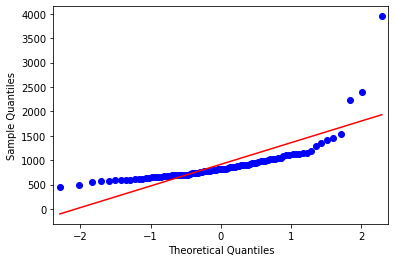

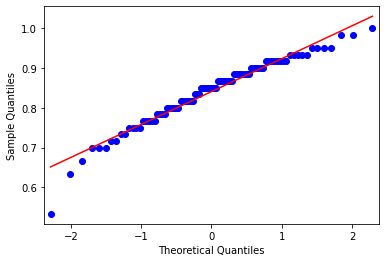

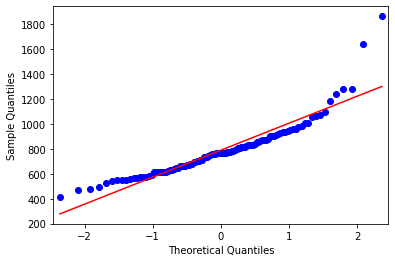

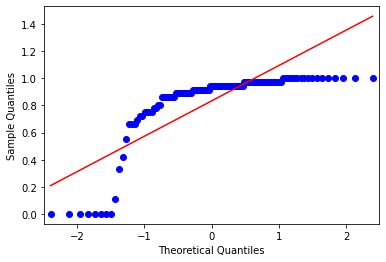

In [ ]:
##Evtl. an dieser Stelle mässig sinnvoll, sollte eher geprüft werden sobald die Daten verwendet werden -> dann werden z.B. NaN Werte entfernt etc.

#Test for normality # Michelle: Wir müssten m.E. einen Shapiro-Wilk-Test (oder einen Kolmogorov-Smirnov-Test, gut bei kleineren Stichproben) zur Überprüfung der Normalverteilung vornehmen.
#Michelle: Das Resultat (normalverteilt oder nicht) entscheidet darüber, welche Tests wir verwenden müssen (z.B. Spearman (nicht normalvert) oder Pearson (normalvert) Korrelation).
HF_agg2 = HF_agg[['RT_shifting_MG', 'accuracy_shifting_MG', 'RT_inhibition_FGT', 'accuracy_inhibition_FGT']]
for column in HF_agg2:
  print('\033[1m', column, '\033[0m')
  k2, p = stats.normaltest(HF_agg[column]) # D Agostino-Pearson. The method returns the test statistic value and the p-value
  alpha = 0.001 # Rejection criterion defined by you
  print('Alpha = ',alpha)
  print('p = ',p)
  if p < alpha:  # null hypothesis: x comes from a normal distribution
      print("The null hypothesis can be rejected\n")
  else:
    print("The null hypothesis cannot be rejected\n")


#QQ-Plots
#NaN Werte sind überall rausgenommen
fig = sm.qqplot(HF_agg['RT_shifting_MG'].dropna(), line='s')
fig2 =  sm.qqplot(HF_agg['accuracy_shifting_MG'][(HF_agg['accuracy_shifting_MG'] > 0)], line='s')
fig3 = sm.qqplot(HF_agg['RT_inhibition_FGT'].dropna(), line='s') 
fig4 =  sm.qqplot(HF_agg['accuracy_inhibition_FGT'].dropna(), line='s')


##Handwriting

###Read data

In [ ]:
handwriting = pd.read_excel(path+"Schreiben.xlsx")
handwriting = handwriting.rename({'PERS': 'ID'}, axis=1)
handwriting

,ID,VERS,VEDESC,START,ENDE,SETON,PERCON,TIMEON,TIMEOFF,PONANZ,PAUSEONT,POFFANZ,PAUSEOFFT,PATHON,PATHOFF,ABSVON,ABSVOFF,NIV,PERCNIV,FREQ,PRESS
0,1104,1,Name(300s),0,10457,6,50.88,5320,5137,0,0,0,0,98.72413,83.46312,19.25493,15.62930,5.25000,25.00000,1.22324,1.53675
1,1104,2,Der See ist tief(300,0,24022,21,41.25,9910,14112,0,0,3,1019,247.35588,391.82816,25.36736,27.46829,2.51852,55.55556,2.07660,1.23234
2,1104,3,Doris geht ins Kino(,0,23295,24,46.20,10763,12532,0,0,1,227,296.91107,416.00180,28.04554,32.74924,2.22581,67.74194,2.00907,1.21226
3,1104,4,lch kaufe frisches B,0,49818,31,36.61,18236,31582,0,0,3,1810,340.26736,803.80756,18.86645,25.34476,3.76923,41.02564,1.50127,1.11249
4,1104,5,Heute scheint die So,0,57268,30,26.55,15207,42061,0,0,8,7782,343.00992,632.04822,22.70331,18.38955,2.68750,40.62500,1.63432,0.90530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,1917,1,Name(300s),0,9440,8,53.65,5065,4375,0,0,0,0,238.88934,203.78230,47.66600,45.42066,4.50000,50.00000,0.92137,1.06148
586,1917,2,NaN,0,65983,22,30.47,20108,45875,0,0,4,8179,918.56329,1186.56458,45.96941,29.69456,4.12500,42.50000,1.18085,0.99229
587,1917,3,NaN,0,81274,26,46.89,38110,43164,3,826,7,2848,981.75305,1208.71191,25.95814,33.33979,7.09434,24.52830,0.86993,1.43035
588,1917,4,NaN,0,90215,33,43.10,38885,51330,2,538,7,2479,1223.42383,1536.27832,31.67339,35.19494,6.40000,16.36364,0.86868,1.31149


###Create variables

In [ ]:
# Löschen der Zeile mit VEDESC Name, da diese Werte nicht vergleichbar sind
handwriting = handwriting[handwriting.VEDESC != 'Name(300s)']
handwriting.head(5)

,ID,VERS,VEDESC,START,ENDE,SETON,PERCON,TIMEON,TIMEOFF,PONANZ,PAUSEONT,POFFANZ,PAUSEOFFT,PATHON,PATHOFF,ABSVON,ABSVOFF,NIV,PERCNIV,FREQ,PRESS
1,1104,2,Der See ist tief(300,0,24022,21,41.25,9910,14112,0,0,3,1019,247.35588,391.82816,25.36736,27.46829,2.51852,55.55556,2.07660,1.23234
2,1104,3,Doris geht ins Kino(,0,23295,24,46.20,10763,12532,0,0,1,227,296.91107,416.00180,28.04554,32.74924,2.22581,67.74194,2.00907,1.21226
3,1104,4,lch kaufe frisches B,0,49818,31,36.61,18236,31582,0,0,3,1810,340.26736,803.80756,18.86645,25.34476,3.76923,41.02564,1.50127,1.11249
4,1104,5,Heute scheint die So,0,57268,30,26.55,15207,42061,0,0,8,7782,343.00992,632.04822,22.70331,18.38955,2.68750,40.62500,1.63432,0.90530
6,1106,2,NaN,0,46875,21,42.65,19993,26882,4,1778,0,0,391.92590,1063.04370,19.88930,39.29250,4.70000,53.33334,1.24450,2.05560


In [ ]:
# Irrelevante Variablen ausblenden und die Werte pro ID aggregieren
handwriting_agg = handwriting.groupby('ID').aggregate({'TIMEON' : 'mean', 'TIMEOFF' : 'mean', 'NIV': 'mean', 'PRESS' : 'mean'})
handwriting_agg

,TIMEON,TIMEOFF,NIV,PRESS
ID,,,,
1104,13529.00,25071.75,2.800265,1.115597
1106,22556.50,26806.00,5.444927,2.518980
1107,15633.00,38418.00,2.219918,1.332407
1108,19460.50,28783.50,4.365220,1.880460
1109,20882.00,52177.25,3.530073,0.966778
...,...,...,...,...
1913,11482.75,15754.75,2.348460,0.795972
1914,19978.25,29434.50,5.578395,1.307640
1915,15225.00,19579.75,3.280180,1.317315


###Descriptive statistics

In [ ]:
handwriting_agg.describe().astype(int)

,TIMEON,TIMEOFF,NIV,PRESS
count,117,117,117,117
mean,21779,37332,5,1
std,7068,13441,2,0
min,9820,9430,1,0
25%,16091,28314,3,1
50%,20424,35239,4,1
75%,26732,44600,6,1
max,41003,79901,12,2


In [ ]:
kurt = handwriting_agg.kurt(axis = 0, skipna = True)
print('Kurtosis TIMEON: ', kurt['TIMEON'])
print('Kurtosis TIMEOFF: ', kurt['TIMEOFF'])
print('Kurtosis NIV: ', kurt['NIV'])
print('Kurtosis PRESS: ', kurt['PRESS'])

Kurtosis TIMEON:  -0.2649964876709068
Kurtosis TIMEOFF:  0.5745927323878735
Kurtosis NIV:  0.328469269721436
Kurtosis PRESS:  0.34513285528928694


In [ ]:
skew = handwriting_agg.skew(axis = 0, skipna = True)
print('Skewness TIMEON: ', skew['TIMEON'])
print('Skewness TIMEOFF: ', skew['TIMEOFF'])
print('Skewness NIV: ', skew['NIV'])
print('Skewness PRESS: ', skew['PRESS'])

Skewness TIMEON:  0.7236760629877341
Skewness TIMEOFF:  0.6286350504553192
Skewness NIV:  0.8019600480286788
Skewness PRESS:  0.6300319898500812


Text(0.5, 1.0, 'Druck')

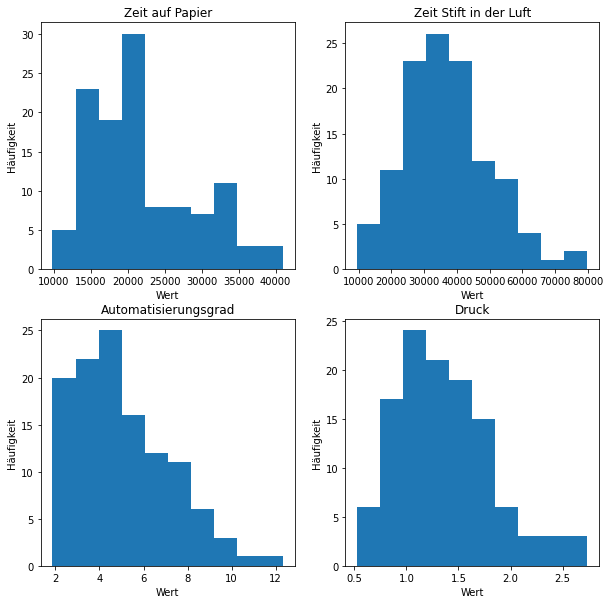

In [ ]:
#histograms
plt.figure(figsize=(10  ,10))
plt.subplot(221)
plt.hist(handwriting_agg['TIMEON'])
plt.xlabel("Wert")
plt.ylabel("Häufigkeit")
plt.title('Zeit auf Papier')

plt.subplot(222)
plt.hist(handwriting_agg['TIMEOFF'])
plt.xlabel("Wert")
plt.ylabel("Häufigkeit")
plt.title('Zeit Stift in der Luft')

plt.subplot(223)
plt.hist(handwriting_agg['NIV'])
plt.xlabel("Wert")
plt.ylabel("Häufigkeit")
plt.title('Automatisierungsgrad')

plt.subplot(224)
plt.hist(handwriting_agg['PRESS'])
plt.xlabel("Wert")
plt.ylabel("Häufigkeit")
plt.title('Druck')

### Shapiro-Wilk test

The following code shows how to perform a Shapiro-Wilk test on this sample to determine if it came from a normal distribution: 

In [ ]:
niv_shapiro = list(shapiro(handwriting_agg['NIV']))
timeon_shapiro = list(shapiro(handwriting_agg['TIMEON']))
timeoff_shapiro = list(shapiro(handwriting_agg['TIMEOFF']))
press_shapiro = list(shapiro(handwriting_agg['PRESS']))

In [ ]:
hw_shapiro = pd.DataFrame({'NIV': niv_shapiro, 'TIMEON': timeon_shapiro, 'TIMEOFF': timeoff_shapiro, 'PRESS': press_shapiro})
hw_shapiro.astype(float)
new1 = hw_shapiro.T
new2 = new1.rename(columns={0: 'Test_Statistic', 1: 'P-Value'})
new2.head()

,Test_Statistic,P-Value
NIV,0.946734,0.000154
TIMEON,0.938634,0.000043
TIMEOFF,0.974190,0.023432
PRESS,0.969467,0.009052


Since the p-value is less than .05, we reject the null hypothesis. We have sufficient evidence to say that the sample data does not come from a normal distribution.

In [ ]:
new2.loc[new2['P-Value'] >= 0.05, 'The null hypothesis can be rejected'] = 'True'
new2.loc[new2['P-Value'] < 0.05, 'The null hypothesis can be rejected'] = 'False'
new2

,Test_Statistic,P-Value,The null hypothesis can be rejected
NIV,0.946734,0.000154,False
TIMEON,0.938634,0.000043,False
TIMEOFF,0.974190,0.023432,False
PRESS,0.969467,0.009052,False


### Find Outliners

(array([31]),)


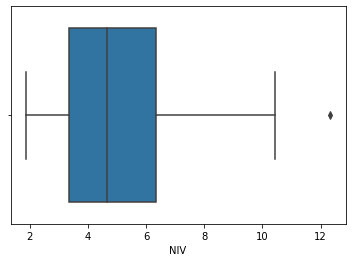

In [ ]:
sns.boxplot(x=handwriting_agg['NIV'])
#sns.boxplot(x=handwriting_agg['PRESS'])
z = np.abs(stats.zscore(handwriting_agg['NIV']))
threshold = 3
print(np.where(z > 3))

(array([18, 31, 98]), array([1, 2, 1]))


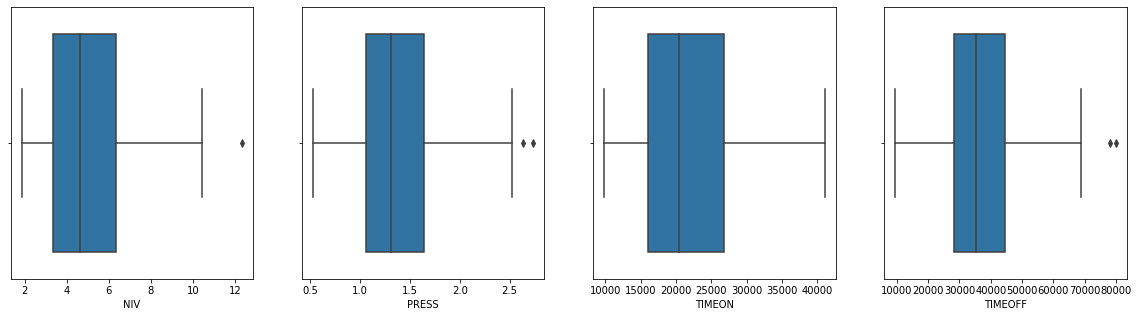

In [ ]:
fig, axs = plt.subplots(ncols=4, figsize=(20,5))
sns.boxplot(x='NIV', data=handwriting_agg, ax=axs[0])
sns.boxplot(x='PRESS', data=handwriting_agg, ax=axs[1])
sns.boxplot(x='TIMEON', data=handwriting_agg, ax=axs[2])
sns.boxplot(x='TIMEOFF', data=handwriting_agg, ax=axs[3])
z = np.abs(stats.zscore(handwriting_agg))
threshold = 3
print(np.where(z > 3))

## Fine motor skills kindergarden

###Read Data

In [ ]:
fms_kg = pd.read_excel(path+'Feinmotorik_Kindergarten.xlsx')
fms_kg.head().astype(int)

,ID,AgeMonths_2018,FineMotor_2018,GrossMotor_2018,SocialDevelopment_2018,Total_2018,AgeMonths_2019,FineMotor_2019,GrossMotor_2019,SocialDevelopment_2019,Total_2019
0,1104,59,5,5,4,14,72,9,6,5,20
1,1106,61,6,7,9,22,73,6,8,14,28
2,1107,64,6,5,2,13,76,8,10,8,26
3,1108,50,10,9,10,29,63,10,10,14,34
4,1109,52,4,8,10,22,66,4,7,9,20


In [ ]:
fms_kg['AgeYears_2018']=(fms_kg['AgeMonths_2018']/12) # Kannst du mir das erklären? (Aus satistischer Sicht besser mit Monaten rechnen)
fms_kg['AgeYears_2019']=(fms_kg['AgeMonths_2019']/12)
fms_kg_select = fms_kg[['ID', 'FineMotor_2018', 'FineMotor_2019']]
fms_kg_select.head().astype(int)

,ID,FineMotor_2018,FineMotor_2019
0,1104,5,9
1,1106,6,6
2,1107,6,8
3,1108,10,10
4,1109,4,4


###Create new variables

###Descriptive Statistics

In [ ]:
fms_kg_select.describe().round(2)

,ID,FineMotor_2018,FineMotor_2019
count,94.00,83.00,83.00
mean,1521.55,7.30,8.41
std,296.16,2.32,1.93
min,1104.00,2.00,2.00
25%,1217.25,6.00,8.00
50%,1605.50,7.00,9.00
75%,1807.75,9.00,10.00
max,1917.00,11.00,10.00


Text(0.5, 1.0, 'FineMotor_2019')

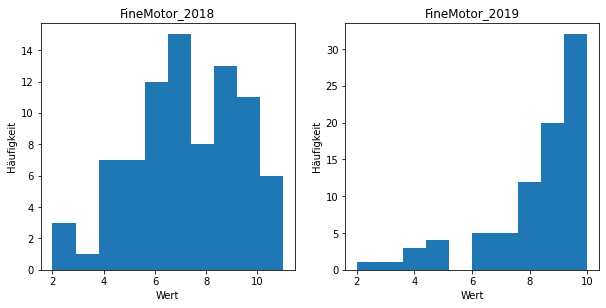

In [ ]:
#histograms
plt.figure(figsize=(10  ,10))
plt.subplot(221)
plt.hist(fms_kg_select['FineMotor_2018'])
plt.xlabel("Wert")
plt.ylabel("Häufigkeit")
plt.title('FineMotor_2018')

plt.subplot(222)
plt.hist(fms_kg_select['FineMotor_2019'])
plt.xlabel("Wert")
plt.ylabel("Häufigkeit")
plt.title('FineMotor_2019')




## Feinmotorik in der ersten Klasse
#### Daten "GRAFOS_Feinmotorik_0908: 
- Variable "GRAFOS" berechnen: Mean über jede Form (aus 6 Wiederholungen), dann Mean über alle Means der 13 Formen berechnen
- Variable "Feinmotorik_firstGrade" berechnen: MEAN (('AusmalenKreis' +'AusmalenStern'), ('SpurEckig' + 'SpurKurvig'), 'PunkteVerbinden', 'PapierFalten', 'KreisAusschneiden')


###Read data

In [ ]:
fms_frgrade = pd.read_excel(path+'GRAFOS_Feinmotorik_0908.xlsx', header = 1)
fms_frgrade.describe()

,ID,Bu111StrichVertikalForm,Bu112StrichVertikalForm,Bu113StrichVertikalForm,Bu114StrichVertikalForm,Bu115StrichVertikalForm,Bu116StrichVertikalForm,MeanSV,Bu211StrichHorizontalForm,Bu212StrichHorizontalForm,Bu213StrichHorizontalForm,Bu214StrichHorizontalForm,Bu215StrichHorizontalForm,Bu216StrichHorizontalForm,MeanSH,Bu311BogenNachUntenForm,Bu312BogenNachUntenForm,Bu313BogenNachUntenForm,Bu314BogenNachUntenForm,Bu315BogenNachUntenForm,Bu316BogenNachUntenForm,MeanBU,Bu411BogenNachObenForm,Bu412BogenNachObenForm,Bu413BogenNachObenForm,Bu414BogenNachObenForm,Bu415BogenNachObenForm,Bu416BogenNachObenForm,MeanBO,Bu511KreisForm,Bu512KreisForm,Bu513KreisForm,Bu514KreisForm,Bu515KreisForm,Bu516KreisForm,MeanKreis,Bu611KreuzForm,Bu612KreuzForm,Bu613KreuzForm,Bu614KreuzForm,...,Bu1212RhombusQuerForm,Bu1213RhombusQuerForm,Bu1214RhombusQuerForm,Bu1215RhombusQuerForm,Bu1216RhombusQuerForm,MeanRH,Bu1311FlugForm,Bu1312FlugForm,Bu1313FlugForm,Bu1314FlugForm,Bu1315FlugForm,Bu1316FlugForm,MeanSchlaufen,Bu1411AugenForm,Bu1412AugenForm,Bu1413AugenForm,Bu1414AugenForm,Bu1415AugenForm,Bu1416AugenForm,MeanLA,Bu1511FischForm,Bu1512FischForm,Bu1513FischForm,Bu1514FischForm,Bu1515FischForm,Bu1516FischForm,MeanTropfen,AusmalenKreis_PW,AusmalenStern_PW,SpurEckig,SpurEckig_PW,SpurKurvig,SpurKurvig_PW,PunkteVerbinden,PunkteVerbinden_PW,PapierFalten,PapierFalten_PW,KreisAusschneiden,KreisAusschneiden_PW,FeinmotorikFirstGradeSumme
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0000,48.000000,48.000000,48.000000,48.000000
mean,1419.791667,1.645833,1.729167,1.541667,1.520833,1.625000,1.541667,1.600694,1.166667,1.270833,1.145833,1.270833,1.250000,1.104167,1.201389,1.375000,1.479167,1.395833,1.416667,1.250000,1.520833,1.406250,1.250000,1.437500,1.312500,1.479167,1.187500,1.354167,1.336806,1.541667,1.666667,1.416667,1.583333,1.416667,1.520833,1.524306,1.583333,1.375000,1.354167,1.520833,...,0.333333,0.458333,0.520833,0.312500,0.250000,0.402778,1.062500,0.937500,0.958333,1.104167,1.083333,0.895833,1.006944,0.833333,0.895833,0.791667,0.833333,0.875000,0.833333,0.843750,0.708333,0.458333,0.437500,0.479167,0.416667,0.458333,0.493056,2.458333,2.187500,1.395833,6.020833,6.916667,3.604167,10.666667,5.854167,8.0625,4.333333,10.187500,5.708333,30.166667
std,255.744134,0.483321,0.449093,0.544150,0.583080,0.489246,0.503534,0.261247,0.558620,0.494204,0.545371,0.609834,0.635811,0.592132,0.268430,0.530957,0.545371,0.535529,0.539240,0.483779,0.504852,0.293560,0.601417,0.501328,0.511828,0.583080,0.490603,0.564540,0.271781,0.544150,0.476393,0.498224,0.498224,0.498224,0.545371,0.243083,0.498224,0.530957,0.483321,0.504852,...,0.476393,0.617419,0.545371,0.468417,0.483779,0.334808,0.665447,0.598091,0.682870,0.660096,0.646869,0.721688,0.562793,0.429415,0.472187,0.459340,0.519137,0.443631,0.476393,0.278051,0.617419,0.581939,0.580031,0.618495,0.539240,0.581939,0.331481,0.503534,0.394443,2.294671,1.263052,5.884828,1.685225,1.326222,0.922291,3.3543,1.766513,2.489606,1.543116,4.808385
min,1201.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.666667,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,1.000000,1.000000,1.000000,1.000

###Create new variables

In [ ]:
# Mittelwerte berechnen
fms_frgrade['Mean_VMI'] = ((fms_frgrade['MeanSV'] + fms_frgrade['MeanSH'] + fms_frgrade['MeanBU'] + fms_frgrade['MeanBO'] + fms_frgrade['MeanKreis'] + fms_frgrade['MeanKreuz'] + fms_frgrade['MeanViereck'] + fms_frgrade['MeanDreieck'] + fms_frgrade['MeanRV'] + fms_frgrade['MeanRH'] + fms_frgrade['MeanSchlaufen'] + fms_frgrade['MeanLA'] + fms_frgrade['MeanTropfen']) /13) # VMI mean über 13 means
fms_frgrade.head()

,ID,Bu111StrichVertikalForm,Bu112StrichVertikalForm,Bu113StrichVertikalForm,Bu114StrichVertikalForm,Bu115StrichVertikalForm,Bu116StrichVertikalForm,MeanSV,Bu211StrichHorizontalForm,Bu212StrichHorizontalForm,Bu213StrichHorizontalForm,Bu214StrichHorizontalForm,Bu215StrichHorizontalForm,Bu216StrichHorizontalForm,MeanSH,Bu311BogenNachUntenForm,Bu312BogenNachUntenForm,Bu313BogenNachUntenForm,Bu314BogenNachUntenForm,Bu315BogenNachUntenForm,Bu316BogenNachUntenForm,MeanBU,Bu411BogenNachObenForm,Bu412BogenNachObenForm,Bu413BogenNachObenForm,Bu414BogenNachObenForm,Bu415BogenNachObenForm,Bu416BogenNachObenForm,MeanBO,Bu511KreisForm,Bu512KreisForm,Bu513KreisForm,Bu514KreisForm,Bu515KreisForm,Bu516KreisForm,MeanKreis,Bu611KreuzForm,Bu612KreuzForm,Bu613KreuzForm,Bu614KreuzForm,...,Bu1213RhombusQuerForm,Bu1214RhombusQuerForm,Bu1215RhombusQuerForm,Bu1216RhombusQuerForm,MeanRH,Bu1311FlugForm,Bu1312FlugForm,Bu1313FlugForm,Bu1314FlugForm,Bu1315FlugForm,Bu1316FlugForm,MeanSchlaufen,Bu1411AugenForm,Bu1412AugenForm,Bu1413AugenForm,Bu1414AugenForm,Bu1415AugenForm,Bu1416AugenForm,MeanLA,Bu1511FischForm,Bu1512FischForm,Bu1513FischForm,Bu1514FischForm,Bu1515FischForm,Bu1516FischForm,MeanTropfen,AusmalenKreis_PW,AusmalenStern_PW,SpurEckig,SpurEckig_PW,SpurKurvig,SpurKurvig_PW,PunkteVerbinden,PunkteVerbinden_PW,PapierFalten,PapierFalten_PW,KreisAusschneiden,KreisAusschneiden_PW,FeinmotorikFirstGradeSumme,Mean_VMI
0,1201,2,2,1,2,1,1,1.500000,0,2,2,1,0,2,1.166667,2,1,1,1,1,2,1.333333,1,1,1,2,1,1,1.166667,1,1,1,2,1,2,1.333333,1,1,1,2,...,0,0,1,0,0.166667,1,0,1,1,1,1,0.833333,0,1,1,0,1,1,0.666667,1,0,1,2,1,1,1.000000,3,2,0,7,10,2,12,7,10,5,8,4,30,1.038462
1,1202,1,1,0,0,1,1,0.666667,0,1,0,0,1,1,0.500000,1,1,2,1,1,1,1.166667,1,1,1,1,1,1,1.000000,2,1,1,1,1,1,1.166667,2,1,2,2,...,0,1,0,1,0.333333,1,2,2,1,1,0,1.166667,1,1,1,1,1,0,0.833333,0,0,0,0,0,1,0.166667,3,2,1,6,7,3,12,7,6,3,9,5,29,0.923077
2,1203,2,2,2,2,1,2,1.833333,1,1,1,2,1,0,1.000000,1,2,2,1,1,1,1.333333,1,1,1,1,1,2,1.166667,1,1,2,2,2,1,1.500000,1,1,1,2,...,1,1,1,0,0.666667,0,1,0,2,2,1,1.000000,2,2,1,1,1,1,1.333333,1,0,0,1,0,2,0.666667,3,2,0,7,6,3,11,6,10,5,12,7,33,1.115385
3,1204,2,1,2,1,2,1,1.500000,1,1,1,2,2,1,1.333333,2,2,1,1,1,2,1.500000,1,2,1,2,1,1,1.333333,1,1,1,1,1,1,1.000000,2,1,1,1,...,2,0,0,0,0.666667,1,1,1,1,1,1,1.000000,1,1,1,1,1,2,1.166667,1,1,2,0,0,1,0.833333,2,2,0,7,1,6,12,7,10,5,12,7,36,1.153846
4,1205,2,2,1,2,2,2,1.833333,2,2,2,1,2,1,1.666667,2,2,1,2,1,2,1.666667,2,1,2,2,2,2,1.833333,2,1,1,2,2,2,1.666667,2,1,2,2,...,0,1,0,0,0.333333,1,1,1,1,1,0,0.833333,1,0,1,1,0,1,0.666667,0,2,1,2,1,0,1.000000,3,3,1,6,4,4,11,6,11,6,8,4,32,1.320513


In [ ]:
# Nur relevante Werte
fms_frgrade_select = fms_frgrade[['ID', 'Mean_VMI', 'FeinmotorikFirstGradeSumme']]
fms_frgrade_select.head()

,ID,Mean_VMI,FeinmotorikFirstGradeSumme
0,1201,1.038462,30
1,1202,0.923077,29
2,1203,1.115385,33
3,1204,1.153846,36
4,1205,1.320513,32


###Descriptive statistics

In [ ]:
fms_frgrade_select.describe().round(2)

,ID,Mean_VMI,FeinmotorikFirstGradeSumme
count,48.00,48.00,48.00
mean,1419.79,1.13,30.17
std,255.74,0.19,4.81
min,1201.00,0.64,18.00
25%,1215.50,1.03,27.50
50%,1307.50,1.14,30.00
75%,1802.25,1.29,33.25
max,1816.00,1.47,40.00


Text(0.5, 1.0, 'Fine Motor Skills')

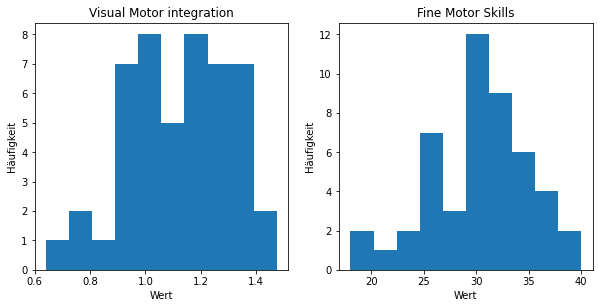

In [ ]:
#histograms
plt.figure(figsize=(10  ,10))
plt.subplot(221)
plt.hist(fms_frgrade_select['Mean_VMI'])
plt.xlabel("Wert")
plt.ylabel("Häufigkeit")
plt.title('Visual Motor integration')

plt.subplot(222)
plt.hist(fms_frgrade_select['FeinmotorikFirstGradeSumme'])
plt.xlabel("Wert")
plt.ylabel("Häufigkeit")
plt.title('Fine Motor Skills')




# Merge Dataframes
Die oben erwähnten Dataframes zusammengesetzt - merged

In [ ]:
from functools import reduce
dfs = [demographics, maulwurf_agg, HF_agg, handwriting_agg, fms_kg_select, fms_frgrade_select]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['ID'],
                                            how='outer'), dfs)
df_merged

,ID,Geschlecht,Alter_Monate,Alter_Jahre,spanLength,recognition_fields_correct,recognition_fieldsCorrect_irrespectivePosition,correct_MG,trials_MG,RT_shifting_MG,accuracy_shifting_MG,correct_FGT,trials_FGT,RT_inhibition_FGT,accuracy_inhibition_FGT,TIMEON,TIMEOFF,NIV,PRESS,FineMotor_2018,FineMotor_2019,Mean_VMI,FeinmotorikFirstGradeSumme
0,1104,0.0,89.0,7.0,0.0,9.0,21.0,0.0,60.0,NaN,0.000000,26.0,36.0,1053.230769,0.722222,13529.00,25071.75,2.800265,1.115597,5.0,9.0,NaN,NaN
1,1106,1.0,91.0,7.0,3.0,37.0,53.0,51.0,60.0,642.078431,0.850000,31.0,36.0,830.354839,0.861111,22556.50,26806.00,5.444927,2.518980,6.0,6.0,NaN,NaN
2,1107,1.0,94.0,7.0,2.0,20.0,39.0,49.0,60.0,841.000000,0.816667,32.0,36.0,696.625000,0.888889,15633.00,38418.00,2.219918,1.332407,6.0,8.0,NaN,NaN
3,1108,0.0,81.0,6.0,2.0,12.0,21.0,52.0,60.0,853.480769,0.866667,34.0,36.0,767.794118,0.944444,19460.50,28783.50,4.365220,1.880460,10.0,10.0,NaN,NaN
4,1109,1.0,83.0,6.0,3.0,29.0,34.0,0.0,60.0,NaN,0.000000,0.0,36.0,NaN,0.000000,20882.00,52177.25,3.530073,0.966778,4.0,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1816,1.0,97.0,8.0,3.0,24.0,32.0,46.0,60.0,947.282609,0.766667,36.0,36.0,481.833333,1.000000,14637.00,40549.00,3.412500,1.534480,7.0,NaN,1.128205,29.0
116,1817,1.0,90.0,7.0,3.0,27.0,33.0,52.0,60.0,619.038462,0.866667,36.0,36.0,626.888889,1.000000,32775.75,78127.75,4.918975,2.420973,9.0,8.0,NaN,NaN
117,1819,1.0,84.0,7.0,4.0,40.0,59.0,55.0,60.0,582.200000,0.916667,36.0,36.0,547.972222,1.000000,9820.50,20760.25,1.866883,0.819035,NaN,NaN,NaN,NaN
118,-99,NaN,NaN,NaN,NaN,NaN,NaN,0.0,60.0,NaN,0.000000,0.0,36.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
'''df_merged = df_merged.dropna()
df_merged.info'''

'df_merged = df_merged.dropna()\ndf_merged.info'

In [ ]:
df_merged.describe().round(2)

,ID,Geschlecht,Alter_Monate,Alter_Jahre,spanLength,recognition_fields_correct,recognition_fieldsCorrect_irrespectivePosition,correct_MG,trials_MG,RT_shifting_MG,accuracy_shifting_MG,correct_FGT,trials_FGT,RT_inhibition_FGT,accuracy_inhibition_FGT,TIMEON,TIMEOFF,NIV,PRESS,FineMotor_2018,FineMotor_2019,Mean_VMI,FeinmotorikFirstGradeSumme
count,120.00,118.00,118.00,118.00,116.00,116.00,116.00,117.00,117.0,90.00,117.00,117.00,117.0,109.00,117.00,117.00,117.00,117.00,117.00,83.00,83.00,48.00,48.00
mean,1513.17,0.54,88.75,6.92,2.79,30.35,42.54,38.79,60.0,915.95,0.65,30.02,36.0,789.89,0.83,21779.20,37332.31,5.04,1.36,7.30,8.41,1.13,30.17
std,326.36,0.50,5.26,0.54,0.97,15.67,16.65,21.78,0.0,445.91,0.36,9.46,0.0,217.79,0.26,7068.60,13441.17,2.15,0.46,2.32,1.93,0.19,4.81
min,-99.00,0.00,80.00,6.00,0.00,8.00,15.00,0.00,60.0,449.46,0.00,0.00,36.0,415.25,0.00,9820.50,9430.25,1.87,0.53,2.00,2.00,0.64,18.00
25%,1215.50,0.00,85.00,7.00,2.00,20.75,33.00,40.00,60.0,698.02,0.67,31.00,36.0,646.00,0.86,16091.50,28314.00,3.35,1.05,6.00,8.00,1.03,27.50
50%,1608.50,1.00,88.00,7.00,3.00,27.50,38.00,49.00,60.0,818.90,0.82,34.00,36.0,766.22,0.94,20424.50,35239.75,4.65,1.31,7.00,9.00,1.14,30.00
75%,1806.25,1.00,92.00,7.00,3.00,40.25,53.00,53.00,60.0,993.91,0.88,35.00,36.0,873.52,0.97,26732.50,44600.75,6.35,1.64,9.00,10.00,1.29,33.25
max,1917.00,1.00,103.00,8.00,6.00,82.00,110.00,60.00,60.0,3947.90,1.00,36.00,36.0,1866.08,1.00,41003.75,79901.00,12.33,2.74,11.00,10.00,1.47,40.00


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


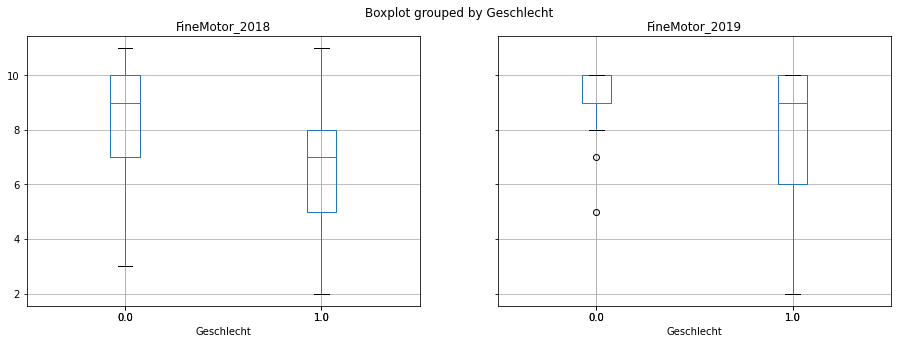

In [ ]:
boxplot = df_merged.boxplot(column = ['FineMotor_2018', 'FineMotor_2019'], by="Geschlecht", figsize=(15, 5))
plt.show()

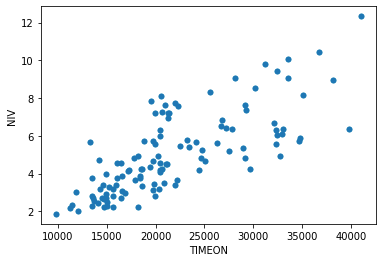

In [ ]:
ax = df_merged.plot(x='TIMEON',y='NIV',kind="scatter",c='c')
sns.scatterplot(x="TIMEON", y="NIV",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=df_merged, ax=ax)

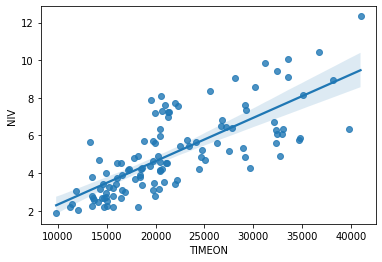

In [ ]:
sns.regplot(x="TIMEON", y="NIV", data=df_merged);

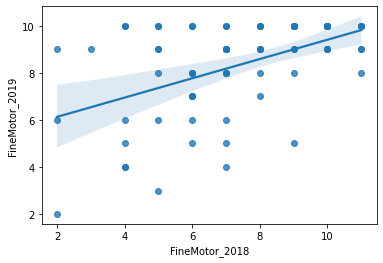

In [ ]:
sns.regplot(x="FineMotor_2018", y="FineMotor_2019", data=df_merged);

#Export Dataframe to Excel

In [ ]:
df_merged.to_excel(path+"CAS_Data.xlsx") 